# TP 3 Simulation de loi normale

Quelques imports préliminaires

In [1]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt 


# version (ultra) courte du progamme de simulation d'exponentielle
def exp(N,lam):
    E=[-math.log(1-random.random())/lam for k in range(N)]
    return E

## Simulation d'une variable aléatoire normale par utilisation du TCL

In [2]:
# programme qui simule une observation d'une v.a normale par application du TCL sur des v.a. uniforme
def ObsNormaleTCL(n):
    G=0
    for i in range(n):
        G+=random.random()
    return (G-n/2)/math.sqrt(n/12)

# programme qui simule une v.a normale (c'est-à dire un échantillon d'observations de taille N)
def NormaleTCL(N,n):
    G=[]
    for i in range(N):
        G.append(ObsNormaleTCL(n))
    return G

Notre échantillon a pour moyenne empirique -0.0004656119867772295  et pour variance empirique 0.9988945638871957


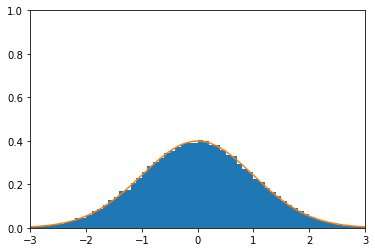

In [46]:
# Simulation de la variable 
N=100000 # nombre d'obervations
n=10 # nombre de va sous-jacentes utilisé dans le TCL pour la simulation de la variable
G=NormaleTCL(N,n)

print("Notre échantillon a pour moyenne empirique",np.mean(G)," et pour variance empirique", np.var(G))



# tracé de l'histogramme et de la densité
# paramétrage de la plage de valeur prises en compte dans le calcul de l'histo (i.e. : toutes les valeurs)
a=math.floor(min(G))-1
b=math.floor(max(G))+1
Delta=0.1
N=int((b-a)/Delta)

# paramétrage la l'affichage
A=-3
B=3
plt.xlim(A,B)
plt.ylim(0,1)

plt.hist(G,range=(a,b),bins=N,density=True)

x=np.linspace(A,B,101) # crée le vecteur [A, A+eps, A+2epx..... ,B] avec eps=(B-A)/100

plt.plot(x,np.exp(-x**2/2)/np.sqrt(2*np.pi))  #

plt.show()

## Simulation de va normale par l'algorithme de Box-Muller

In [11]:
# programme qui simule une v.a normale (c'est-à dire un echantillon d'observations de taille N)
def NormaleBM(N):
    Nd=int(math.floor(N/2)) # On simule les variables aléatoires par paire
    L=[]
    for i in range(Nd):
        U1=random.random()
        U2=random.random()
        Theta=2*math.pi*U1
        R=math.sqrt(-2*math.log(U2))
        X=R*math.cos(Theta)
        Y=R*math.sin(Theta)
        L.append(X)
        L.append(Y)
    
    # Dans le cas où N est impaire, on simule une derniere va normale
    if N%2==1 :  
        U1=random.random()
        U2=random.random()
        Theta=2*math.pi*U1
        R=math.sqrt(-2*math.log(U2))
        X=R*math.cos(Theta)
        L.append(X)
    
    return L

In [15]:
#tests 
print(NormaleBM(5))
print(NormaleBM(6))


[0.27361372604558853, 0.5531043419357387, 0.13975068485880776, 0.10088201702969837, -0.42251851872479446]
[0.4641607011005856, -0.8958889792713143, 0.7335398202432232, -0.3450381119933399, 1.0524127416098104, -0.9049314193101977]


In [19]:
# Simulation de la variable 
N=10000 #Nombre d'observation
G=NormaleBM(N)

print("Notre échantillon a pour moyenne empirique",np.mean(G)," et pour variance empirique", np.var(G))


Notre échantillon a pour moyenne empirique 0.019827262141288837  et pour variance empirique 0.9821410238769562


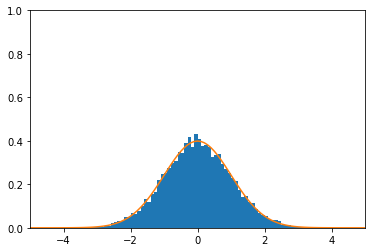

In [21]:
# Simulation de la variable 
N=10000 #Nombre d'obervations
G=NormaleBM(N)

# tracé de l'histogramme et de la densité
# paramétrage de la plage de valeur prises en compte dans le calcul de l'histo (i.e. : toutes les valeurs)
a=math.floor(min(G))-1
b=math.floor(max(G))+1
Delta=0.1
N=int((b-a)/Delta)

# paramétrage la l'affichage
A=-5
B=5
plt.xlim(A,B)
plt.ylim(0,1)

plt.hist(G,range=(a,b),bins=N,density=True)

x=np.linspace(A,B,101) # crée le vecteur [A, A+eps, A+2epx..... ,B] avec eps=(B-A)/100

plt.plot(x,np.exp(-x**2/2)/np.sqrt(2*np.pi))  #

plt.show()

## Simulation de va normale par l'algorithme de Marsaglia

In [22]:
# programme qui simule une v.a normale (c'est-à dire un echantillon d'observation de taille N)
def NormaleMars(N):
    L=[]
    while(len(L)<N):
        V1=2*random.random()-1
        V2=2*random.random()-1
        S=V1**2+V2**2
        if (S<1):
            X=math.sqrt(-2*math.log(S)/S)*V1     
            Y=math.sqrt(-2*math.log(S)/S)*V2
            L.append(X)
            L.append(Y)
    return L[0:N]

In [23]:
print(NormaleMars(6))
print(NormaleMars(5))

[0.7590270175661388, -1.0592901730535649, -1.4727840684540587, 0.32152821207186644, -1.0618173128886248, -0.8755127786652376]
[1.2286730462936815, -0.21949271576277965, -0.33865582439458136, 0.9635970435689618, -0.23452945040941348]


Notre échantillon a pour moyenne empirique 0.004606180442472321  et pour variance empirique 0.9879355635059015


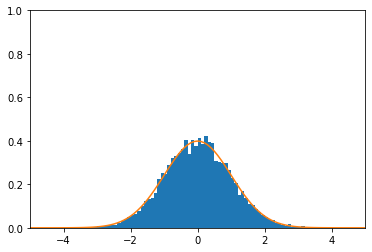

In [26]:
# Simulation de la variable 
N=10000 #Nombre d'obervations
G=NormaleMars(N)

print("Notre échantillon a pour moyenne empirique",np.mean(G)," et pour variance empirique", np.var(G))


# tracé de l'histogramme et de la densité
# paramétrage de la plage de valeur prises en compte dans le calcul de l'histo (i.e. : toutes les valeurs)
a=math.floor(min(G))-1
b=math.floor(max(G))+1
Delta=0.1
N=int((b-a)/Delta)

# paramétrage la l'affichage
A=-5
B=5
plt.xlim(A,B)
plt.ylim(0,1)

plt.hist(G,range=(a,b),bins=N,density=True)

x=np.linspace(A,B,101) # crée le vecteur [A, A+eps, A+2epx..... ,B] avec eps=(B-A)/100

plt.plot(x,np.exp(-x**2/2)/np.sqrt(2*np.pi))  #

plt.show()

## Simulation d'une variable aléatoire normale de paramètre $\mu$ et $\sigma^2$ quelconque

Soit $X\sim\mathcal{N}(0,1)$

Posons $Y=\mu+\sigma X$. On a

$$Y\sim\mathcal{N}(\mu,\sigma^2).$$

In [35]:
def NormaleGenerale(N,mu,sigma):  # les paramètres sont l'esperance mu et l'ECART-TYPE
        G=np.array(NormaleBM(N))     # on transforme le résulat en tableau numpy pour pouvoir le manipuler plus aisément
        G=G*sigma+mu 
        return G

Notre échantillon a pour moyenne empirique 1.9889534922304792  et pour variance empirique 9.017869625620133


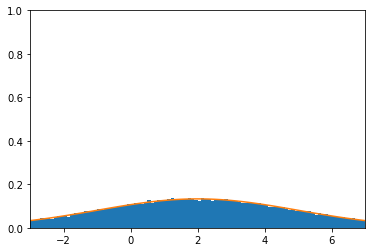

In [43]:
# Simulation de la variable 
N=100000# nbre d'obervations
mu=2
sigma=3
G=NormaleGenerale(N,mu,sigma)

print("Notre échantillon a pour moyenne empirique",np.mean(G)," et pour variance empirique", np.var(G))


# tracé de l'histogramme et de la densité
# paramétrage de la plage de valeur prises en compte dans le calcul de l'histo (i.e. : toutes les valeurs)
a=math.floor(min(G))-1
b=math.floor(max(G))+1
Delta=0.1
N=int((b-a)/Delta)

# paramétrage la l'affichage
A=-3
B=7
plt.xlim(A,B)
plt.ylim(0,1)

plt.hist(G,range=(a,b),bins=N,density=True)

x=np.linspace(A,B,101) # crée le vecteur [A, A+eps, A+2epx..... ,B] avec eps=(B-A)/100
plt.plot(x,np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)))  #

plt.show()

In [54]:
n=2
import random
X=random.random()
Y=random.random()
Z=random.random()
print(X,Y,Z)

0.08487199515892163 0.8354988781294496 0.7359699890685233


In [55]:
n=2
import random
random.seed(1)
X=random.random()
Y=random.random()
Z=random.random()
print(X,Y,Z)

0.13436424411240122 0.8474337369372327 0.763774618976614


In [53]:
n=2
import random
random.seed(2)
X=random.random()
Y=random.random()
Z=random.random()
print(X,Y,Z)

0.9560342718892494 0.9478274870593494 0.05655136772680869
